# LTSM

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [4]:
df = pd.read_csv('fuel-prices.csv')

df.head()

# EPOCH unit of time Unix time is a date and time representation widely used in computing. It measures time by the 
# number of non-leap seconds that have elapsed since 00:00:00 UTC on 1 January 1970, the Unix epoch. In modern computing, 
# values are sometimes stored with higher granularity, such as microseconds or nanoseconds.

,time,price
0,960177600,1.583
1,960782400,1.607
2,961387200,1.653
3,961992000,1.664
4,962596800,1.684


In [5]:
df.shape

(749, 2)

In [6]:
# Convert index 2 EPOCH value to timestamp
pd.to_datetime(df['time'][2], unit = 's')

Timestamp('2000-06-19 04:00:00')

In [7]:
# Convert index 3 EPOCH value to timestamp
pd.to_datetime(df['time'][3], unit = 's')

Timestamp('2000-06-26 04:00:00')

Come back to these steps once lecture notes updated

<function matplotlib.pyplot.show(close=None, block=None)>

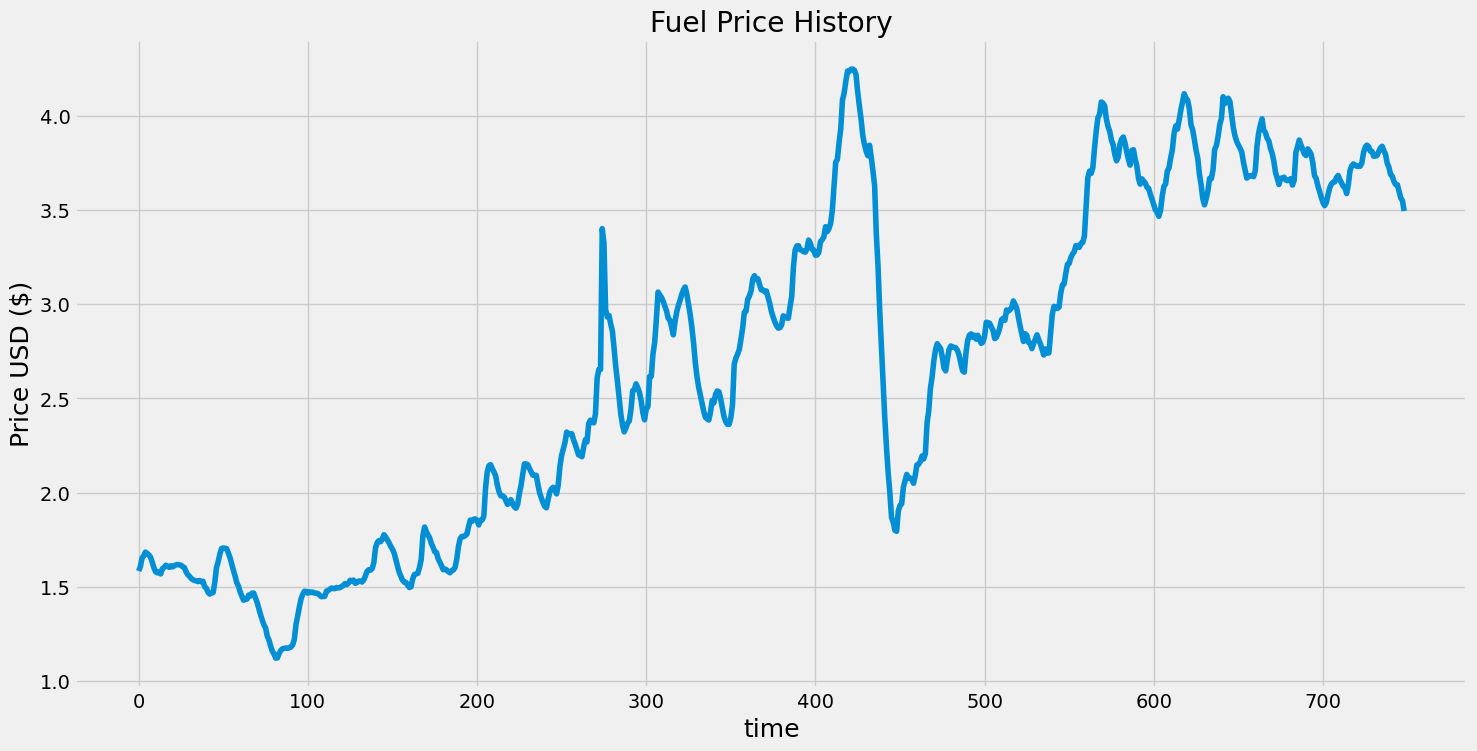

In [9]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.title('Fuel Price History')
plt.plot(df['price'])
plt.xlabel('time', fontsize = 18)
plt.ylabel('Price USD ($)', fontsize = 18)
plt.show

In [10]:
data = df.filter(['price'])

In [11]:
dataset = data.values

In [12]:
dataset.shape

(749, 1)

In [13]:
import math
training_data_len = math.ceil(len(dataset) * 0.8)

In [14]:
training_data_len

600

In [16]:
scaler = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(dataset)

In [17]:
dataset

array([[1.47745443e-01],
       [1.55420531e-01],
       [1.70131116e-01],
       [1.73648865e-01],
       [1.80044771e-01],
       [1.77806204e-01],
       [1.75247841e-01],
       [1.71410297e-01],
       [1.62775823e-01],
       [1.53501759e-01],
       [1.46466262e-01],
       [1.44867285e-01],
       [1.46786057e-01],
       [1.42948513e-01],
       [1.51902782e-01],
       [1.53821554e-01],
       [1.57659098e-01],
       [1.56379917e-01],
       [1.54141350e-01],
       [1.56699712e-01],
       [1.54780940e-01],
       [1.56699712e-01],
       [1.58298689e-01],
       [1.58938280e-01],
       [1.58298689e-01],
       [1.57659098e-01],
       [1.55100736e-01],
       [1.53821554e-01],
       [1.46786057e-01],
       [1.41669332e-01],
       [1.39110969e-01],
       [1.35273425e-01],
       [1.33354653e-01],
       [1.31755676e-01],
       [1.31116086e-01],
       [1.29836904e-01],
       [1.31755676e-01],
       [1.29517109e-01],
       [1.30476495e-01],
       [1.21202430e-01],


In [18]:
train_data = dataset[0:training_data_len, :]

In [19]:
x_train=[]
y_train=[]

In [20]:
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i,0])
    y_train.append(train_data[i,0])

In [21]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [22]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [23]:
x_train.shape

(570, 30, 1)

In [27]:
# with LSTM the default activation function is Tanh-H
model = Sequential()
model.add(LSTM(10, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(10, return_sequences = False))
model.add(Dense(5))
model.add(Dense(1))

In [28]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

In [30]:
model.fit(x_train, y_train, batch_size = 5, epochs = 10)

Epoch 1/10
114/114 [==============================] - 4s 10ms/step - loss: 0.0490 - accuracy: 0.0035
Epoch 2/10
114/114 [==============================] - 1s 10ms/step - loss: 0.0082 - accuracy: 0.0035
Epoch 3/10
114/114 [==============================] - 1s 11ms/step - loss: 0.0071 - accuracy: 0.0035
Epoch 4/10
114/114 [==============================] - 1s 10ms/step - loss: 0.0054 - accuracy: 0.0035
Epoch 5/10
114/114 [==============================] - 1s 11ms/step - loss: 0.0045 - accuracy: 0.0035
Epoch 6/10
114/114 [==============================] - 1s 10ms/step - loss: 0.0039 - accuracy: 0.0035
Epoch 7/10
114/114 [==============================] - 1s 10ms/step - loss: 0.0039 - accuracy: 0.0035
Epoch 8/10
114/114 [==============================] - 1s 10ms/step - loss: 0.0031 - accuracy: 0.0035
Epoch 9/10
114/114 [==============================] - 1s 10ms/step - loss: 0.0030 - accuracy: 0.0035
Epoch 10/10
114/114 [==============================] - 1s 10ms/step - loss: 0.0027 - accura